Er zijn voor deze opdracht 'geen' libraries gebruikt. Alle gebruikte methoden zijn zelf uitgewerkt. De enige gebruikte libraries:

- CSV voor het verwerken van data uit CSV bestand
- matplotlib voor het plotten van de grafieken
- sum, len en sorted

Voor de betrouwbaarheidsintervallen heb ik 95% van de data gekozen, waar een kritische waarde van 1,96 bij hoort volgens Z tabel.

Ik heb per functie de wiskundige formule uitgewerkt in latex. Korte uitleg sum $\sum$:<br>
$\displaystyle\sum _{i=1}^{n}\left({l_{i}}\right)$<br>
$l_{i}$ : iteratie i (index) over l<br>
$i = 1$ : index start punt voor iteratie<br>
$n$ : index eindpunt iteratie<br>
$\sum$ : som van alle getallen in iteratie

In [491]:
from csv import *
import matplotlib.pyplot as plt

In [492]:
# loads data from excel into dictionary with structure {columnname = [data], columnname = [data], etc.}
def get_data(file):
    final, data = {}, []
    for i, row in enumerate(file):
        if 'JJ00' in str(row):
            continue
        for j, col in enumerate(row):
            if i == 0:
                data.append([])
                final[col] = j
            else:
                if is_float(col): # convert float values into floats
                    data[j].append(float(col))
                elif is_int(col):
                    data[j].append(int(col)) # convert integer values into integers
                else: 
                    data[j].append(col) # else append string value
                    
    for i in final: # attach each column name to its corresponding datalist
        final[i] = data[final[i]]
    return final


# checks if n is convertible to integer
def is_int(n):
    try:
        int(n)
        return True
    except:
        return False
    

# checks if n is convertible to float
def is_float(n):
    if '.' in n: # all decimals are separated by '.' in floats excel file 
        return True
    return False

__Wiskundige formules met definities:__<br>
- l is de set van waardes
- n is het aantal waardes in l (len(l))<br>

__Mean / gemiddelde:__<br>
Gemiddelde wordt berekend door de som van alle waardes in l door n te delen.<br>

$\displaystyle{\frac {1}{n}}\sum _{i=1}^{n}l_{i}$<br><br>
1 delen door n * som is hetzelfde als som / n.<br>
Ofwel:<br>

${\frac {l_{1}+l_{2}+\cdots +l_{n}}{n}}$<br>

In [493]:
# calculate mean
def mean(l):
    return sum(l) / len(l)

__Median / mediaan:__<br>
Als eerst worden de waardes in l gesorteerd van laag (l) naar hoog (r).<br><br>
Als n oneven is:<br>
index $\left(\dfrac{n+1}{2}\right)$ van l<br>  
Als n even is:<br>
$\frac{\left(\left(index\, \dfrac{n}{2} van\, l\right)+\left(index\, \dfrac{n+1}{2} van\, l\right)\right)}{2}$

In [494]:
# calculate median 
def median(l):
    n = len(l)
    l = sorted(l) # using sorted to sort values in list ascending
    i = (n - 1) // 2 # index
    
    if n % 2 == 0: # if length sorted list is even, return mean of middle two
        return (l[i] + l[i + 1]) / 2
    else: # else return middle value from sorted list
        return l[i]

__Mode / modus:__<br>
De modus is de waarde die het meest voorkomt in l.

In [495]:
# calculate mode    
def mode(l):
    counted = {} # empty dict for counted values
    
    for i in l: # put all values in counted
        
        if not i in counted:
            counted[i] = 1 # if not exist add with count 1
        else:
            counted[i] += 1 # if already exist count + 1
    
    cv = list(counted.values()) # add all values from counted to list
    highest_occurence = max(cv) # get occurence of most occuring value(s) by getting highest counted value
    
    # return most occuring value(s) in datatype list, by looking up the keys with value highest_occurence
    return sorted([i for i in counted if counted[i] == highest_occurence])

__Standaard deviation / standaardafwijking:__<br>

$\displaystyle\sqrt{\dfrac{1}{n}\sum _{i=1}^{n}\left({l_{i}-\mu}\right)^{2}}$<br>

$\mu$ : gemiddelde van l<br>
$l_{i}$ : iteratie i over l<br>
$i = 1$ : start punt voor iteratie<br>

1 delen door n * som is hetzelfde als som / n.<br>
Voor elke waarde in l:<br>
>$(waarde - gemiddelde\, van\, l)^2$<br>

Standaardafwijking / $\sigma$ = $\sqrt{gemiddelde\, van\, l}$

In [496]:
# calculate standard deviation
def std(l):
    mean_l = mean(l) # first get average of list
    squares = [(i - mean_l) ** 2 for i in l] # append square of every (i in original l) - mean of l
    return mean(squares) ** 0.5 # square root of mean is standard deviation | ** 0.5 == square root 

__Regression Line / trendlijn:__<br><br>
n = lengte xs en ys (lengte moet gelijk zijn)<br>

Om de trendlijn te maken berekenen we eerst 2 dingen:
- slope:<br>
$\dfrac{n\left(\sum _{i=1}^{n}{xs_{i} \cdot ys_{i}}\right) - \left(\left(\sum _{i=1}^{n}{xs_{i}}\right)
\cdot\left(\sum _{i=1}^{n}{ys_{i}}\right)\right)}
{n\left(\sum _{i=1}^{n}{xs_{i} \cdot xs_{i}}\right) - \left(\sum _{i=1}^{n}{{xs_{i}}}\right)^{2}}$<br><br>

- y-intercept (start):<br>
$\dfrac{\left(\sum _{i=1}^{n}{ys_{i}}\right) - slope\left(\sum _{i=1}^{n}{xs_{i}}\right)}{n}$<br>

De algemene formule om y van een lijn te berekenen is $y = mx + b$<br>
Voor elke waarde in xs:<br>
>$y_{n} = (slope * waarde) + y\,intercept$

In [497]:
# list multiplication product
def list_multiplication(l1, l2): # list comrehension for list multiplication
    return [l1[i] * l2[i] for i, x in enumerate(l1)] # return list with multiplicated values


# calculate slope and y intercept and calulate trendline
def trendline(xs, ys):
    a = len(xs) * sum(list_multiplication(xs, ys)) # length of xs multiplied with sum of xs*ys (list_product)
    b = sum(xs) * sum(ys) # sum of xs multiplied with sum of ys
    c = len(xs) * sum(list_multiplication(xs, xs)) # length of xs multiplied with sum of xs*xs (list_product)
    d = sum(xs) ** 2 # square sum of xs
    
    m = (a - b) / (c - d) # calculate slope
    b = (sum(ys) - m * sum(xs)) / len(xs) # calculate y intercept (starting point)
    
    return [m * x + b for x in xs] # y = mx + b for calculation y points equation line 

__R Squared Goodness Of Fit__:

R quared is een methode om de trendline te vergelijken met de data. Soms liggen de meeste punten dicht bij de trendline, en soms liggen de punten ver van de trendline. Met R Squared kan berekend worden hoeveel procent van de data dicht bij de trendline ligt. 

Als voorbeeld: r_squared([0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9]) geeft 1.0. Omdat alleen punten van de data op de trendline liggen. Met andere woorden, door de twee lijsten per waarde op index met elkaar te vergelijken, wordt gekeken hoe ver elke 2 waardes van elkaar af liggen.

Dit is de bijbehorende wiskundige formule:

$R^2 = 1 - \frac{\sum _{i=1}^{n}\left({ys_{i}-trendline_{i}}\right)^{2}}{\sum _{i=1}^{n}\left({ys_{i}-meanline_{i}}\right)^{2}}$

In [498]:
# list subtraction product
def list_subtraction(l1, l2): # list comrehension for list subtraction on same indices
    return [l1[i] - l2[i] for i, x in enumerate(l1)] # return list with subtracted values


def squared_error(ys, trendline):
    # subtract original values from trendline values on index
    subtraction_product = list_subtraction(trendline, ys) 
    # multiply previous subtraction_product values also on index
    multiplication_product = list_multiplication(subtraction_product, subtraction_product)
    # return sum of previous multiplication product list values
    return sum(multiplication_product)


def r_squared(ys, trendline):
    # calculate squared error of trendline
    squared_error_trendline = squared_error(ys, trendline)
    # calculate squared error of ys (original values for time span/range)
    meanline_ys = [mean(ys) for x in ys]
    squared_error_ys = squared_error(ys, meanline_ys)
    # return r squared value
    return 1 - (squared_error_trendline / squared_error_ys)

Door een betrouwbaarheidsinterval te berekenen kan er bepaald worden tussen welke punten een procentueel aantal van de data valt. 

In [499]:
# calculation confidence interval with help from https://nl.wikihow.com/Het-betrouwbaarheidsinterval-berekenen
def cf_it(column):
    nv = len(column) # number of values in column
    mn = mean(column) # mean of values in column
    sd = std(column) # standard deviation of values in column
    
    cw = 1.96 # critic value according to Z table for 95% of data
    err = (sd / (nv ** 0.5)) * cw # error marge (left and right extract)
    
    lower =  mn - err # lower bound
    upper =  mn + err # upper bound
    
    return lower, upper # return lower and upper values

__Openen bestand en opslaan data:__

In [500]:
file = reader(open("utrecht.csv"), delimiter=';') # open csv file
data = get_data(file) # get data from csv into dictionary with get_data function

start, end = -50, -1 # limit/range for plotting data, going two years back
x = list(range(len(data['Perioden'][start:end]))) # x axes with months as integers for calculations
xr = data['Perioden'][start:end] # x axes with real months for plotting

%matplotlib inline
plt.rcParams['figure.figsize'] = [14,7] # set size of graphs

__Printen en plotten:__ <br>


Hier zien we hoe bevolkingsgroei gelijk op gaat met immigratie, en niet zozeer met geboortecijfers:



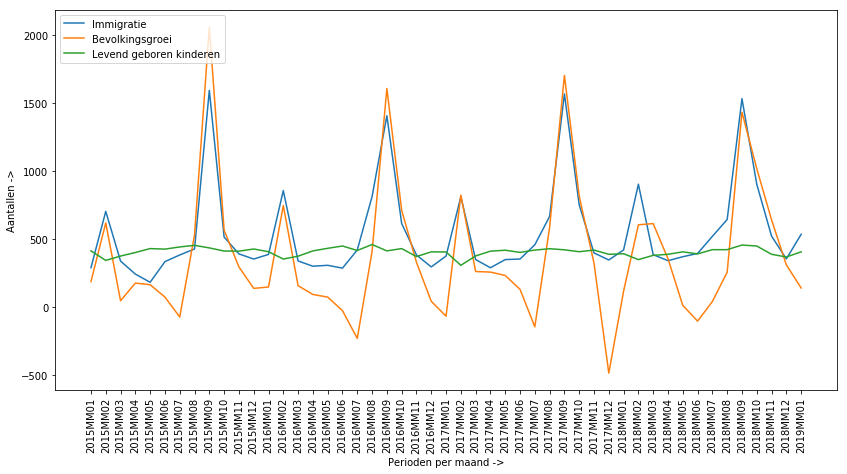

In [501]:
immigratie = data['Immigratie_6'][start:end]
bevolkingsgroei = data['Bevolkingsgroei_11'][start:end]
levendgeborenkinderen = data['LevendGeborenKinderen_2'][start:end]

# plot certain combinations of data
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, immigratie, label='Immigratie')
plt.plot(xr, bevolkingsgroei, label='Bevolkingsgroei')
plt.plot(xr, levendgeborenkinderen, label='Levend geboren kinderen')
plt.legend(loc='upper left')
print("\nHier zien we hoe bevolkingsgroei gelijk op gaat met immigratie, en niet zozeer met geboortecijfers:\n")
plt.show()


Immigratie berekeningen:
Gemiddelde:  546.0408163265306
Mediaan:  392
Modus:  [290, 350, 354, 384, 421, 905]
Standaard deviatie:  342.6923389140091
Betrouwbaarheidsinterval: 95% van de data valt tussen 450.0869614306081 en 641.9946712224531

Hier zien we immigratie inclusief trendlijn:
R Squared waarde voor trendline immigratie:  0.02961519309524041


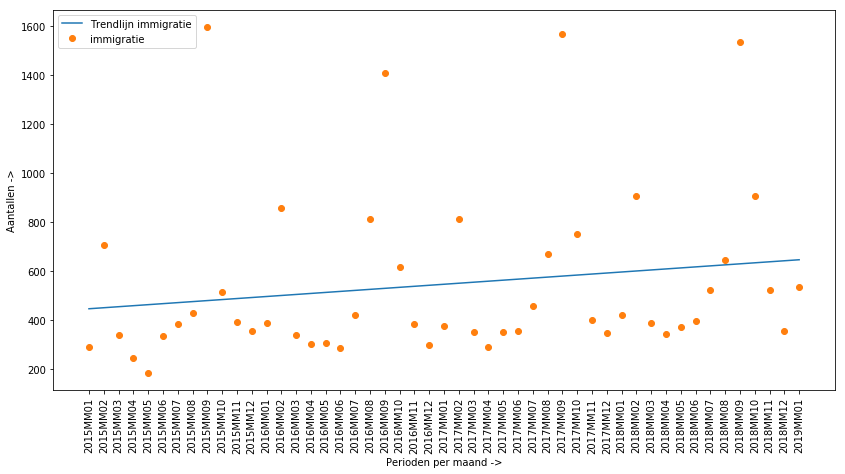

Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data


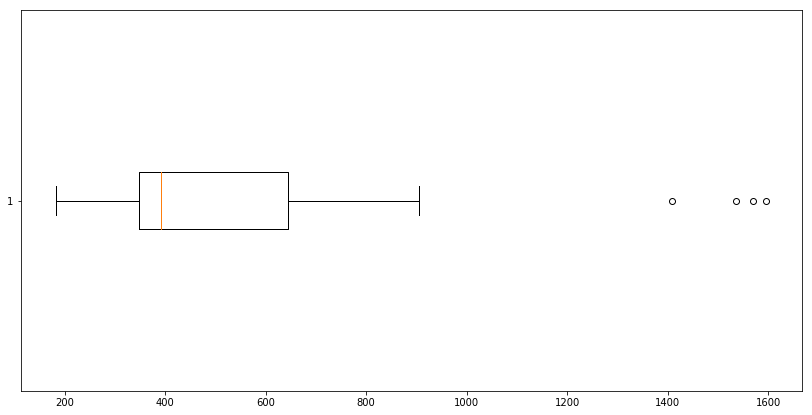

In [502]:
immigratie = data['Immigratie_6'][start:end]
print("\nImmigratie berekeningen:")
print("Gemiddelde: ",mean(immigratie))
print("Mediaan: ", median(immigratie))
print("Modus: ", mode(immigratie))
print("Standaard deviatie: ", std(immigratie))
print("Betrouwbaarheidsinterval: 95% van de data valt tussen " + str(cf_it(immigratie)[0]) + " en " + str(cf_it(immigratie)[1]))
td = trendline(x, immigratie)

plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, td, label='Trendlijn immigratie')
plt.plot(xr, immigratie,'o', label='immigratie')
plt.legend(loc='upper left')
print("\nHier zien we immigratie inclusief trendlijn:")
print("R Squared waarde voor trendline immigratie: ", r_squared(immigratie, td))
plt.show()
print("Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data")
plt.boxplot(immigratie, vert=False)
plt.show()

evolkingsgroei berekeningen:
Gemiddelde:  343302.02040816325
Mediaan:  343038
Modus:  [334364, 334984, 335031, 335208, 335373, 335374, 335447, 335905, 337966, 338533, 338829, 338967, 339115, 339863, 339932, 340021, 340114, 340162, 340188, 340342, 341952, 342665, 342971, 342995, 343038, 343796, 344058, 344316, 344535, 344549, 344680, 345122, 346828, 347483, 347601, 347645, 347969, 348207, 348822, 349088, 349129, 349178, 349191, 349386, 350821, 351841, 352484, 352795, 352936]
Standaard deviatie:  5405.323945774869
Betrouwbaarheidsinterval: 95% van de data valt tussen 341788.5297033463 en 344815.5111129802

Hier zien we bevolkingsgroei inclusief trendlijn:
R Squared waarde voor trendline bevolkingsgroei:  0.9872394095171976


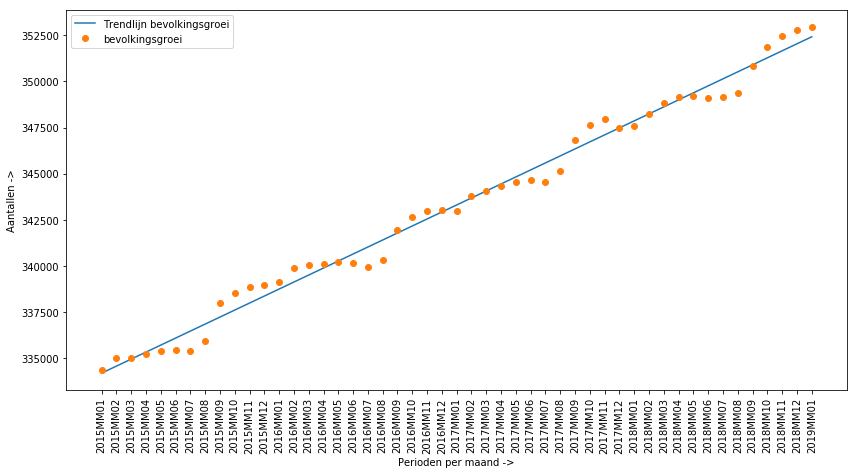

Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data


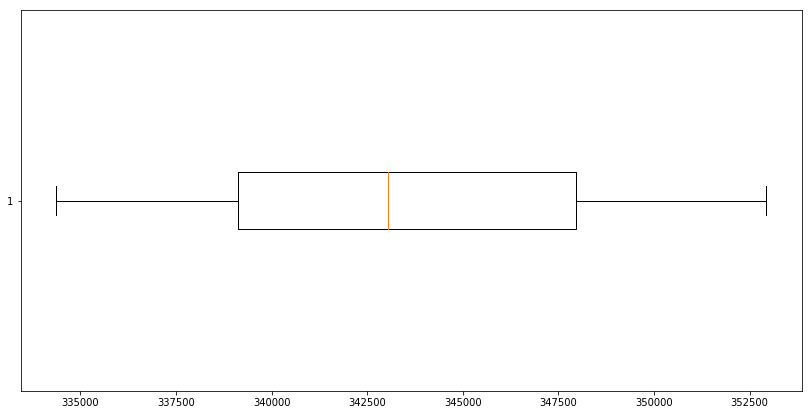

In [503]:
bevolkingsgroei = data['BevolkingAanHetEindeVanDePeriode_15'][start:end]
print("\bevolkingsgroei berekeningen:")
print("Gemiddelde: ",mean(bevolkingsgroei))
print("Mediaan: ", median(bevolkingsgroei))
print("Modus: ", mode(bevolkingsgroei))
print("Standaard deviatie: ", std(bevolkingsgroei))
print("Betrouwbaarheidsinterval: 95% van de data valt tussen " + str(cf_it(bevolkingsgroei)[0]) + " en " + str(cf_it(bevolkingsgroei)[1]))
td = trendline(x, bevolkingsgroei)

plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, td, label='Trendlijn bevolkingsgroei')
plt.plot(xr, bevolkingsgroei,'o', label='bevolkingsgroei')
plt.legend(loc='upper left')
print("\nHier zien we bevolkingsgroei inclusief trendlijn:")
print("R Squared waarde voor trendline bevolkingsgroei: ", r_squared(bevolkingsgroei, td))
plt.show()
print("Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data")
plt.boxplot(bevolkingsgroei, vert=False)
plt.show()

\overledenen berekeningen:
Gemiddelde:  157.69387755102042
Mediaan:  158
Modus:  [136, 140, 160]
Standaard deviatie:  17.618640501692045
Betrouwbaarheidsinterval: 95% van de data valt tussen 152.76065821054664 en 162.6270968914942

Hier zien we overledenen inclusief trendlijn:
R Squared waarde voor trendline overledenen:  0.028773537185869058


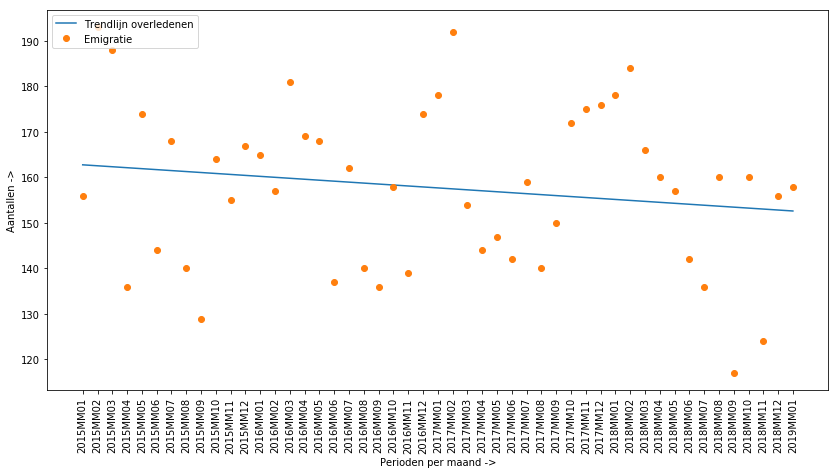

Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data


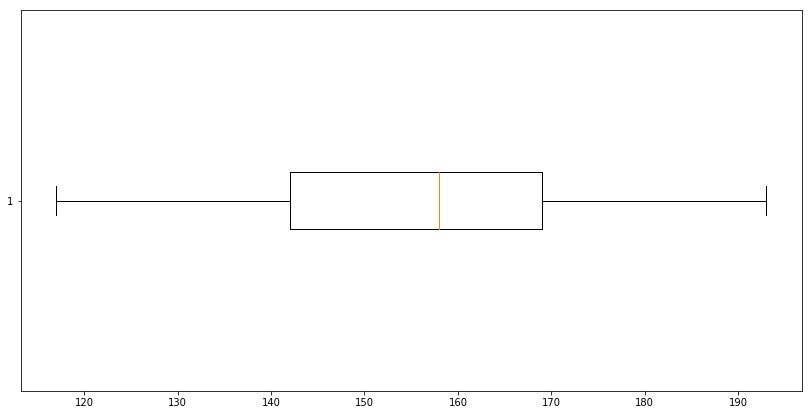

In [504]:
overledenen = data['Overledenen_3'][start:end]
print("\overledenen berekeningen:")
print("Gemiddelde: ",mean(overledenen))
print("Mediaan: ", median(overledenen))
print("Modus: ", mode(overledenen))
print("Standaard deviatie: ", std(overledenen))
print("Betrouwbaarheidsinterval: 95% van de data valt tussen " + str(cf_it(overledenen)[0]) + " en " + str(cf_it(overledenen)[1]))
td = trendline(x, overledenen)

plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, td, label='Trendlijn overledenen')
plt.plot(xr, overledenen,'o', label='Emigratie')
plt.legend(loc='upper left')
print("\nHier zien we overledenen inclusief trendlijn:")
print("R Squared waarde voor trendline overledenen: ", r_squared(overledenen, td))
plt.show()
print("Hier zijn we de boxplot van de dataset met mediaan en verdeling per 25 % van de data")
plt.boxplot(overledenen, vert=False)
plt.show()